In [1]:
from bs4 import BeautifulSoup
import requests
import sys
import pandas as pd
import argparse 
import re as re

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)

In [7]:
soup = BeautifulSoup(response.text, 'lxml')
tr = soup.find_all("tr")

In [8]:
title = [] # list to store the movie titles
director = [] # list to store the name of directors
actors = [] # list to store the name of actors
year = [] # list to store the year of releases
ratings = [] # list to store the movie ratings

In [9]:
title_tag_info = re.compile(r"^(.*?)\(dir\.\)\,(.*?)$") # compile regular expression to get the directors and actors 

for movie in iter(tr):
    if movie.find('td') is not None: # to not go through the first td tag witch is a None object  
        title.append(movie.find('td', {'class': 'titleColumn'}).find('a').contents[0])
        title_tag_info_matched = re.match(title_tag_info, movie.find('td', {'class': 'titleColumn'}).find('a')['title'])
        director.append(title_tag_info_matched.group(1).rstrip())
        actors.append(title_tag_info_matched.group(2).lstrip())
        year.append(movie.find('td', {'class': 'titleColumn'}).find('span', {'class': 'secondaryInfo'}).contents[0].strip('()'))
        ratings.append(movie.find('td', {'class': 'ratingColumn imdbRating'}).find('strong').contents[0])

In [81]:
df = pd.DataFrame({'Title':title,'Director':director,'Actors':actors, 'Release Year':year, 'Ratings':ratings})
df.to_csv('Top_imdb_movies.csv', index=False, encoding='utf-8-sig')

In [82]:
df.dtypes

Title           object
Director        object
Actors          object
Release Year    object
Ratings         object
dtype: object

In [83]:
df = df.astype({'Ratings': 'float32'})
df.dtypes

Title            object
Director         object
Actors           object
Release Year     object
Ratings         float32
dtype: object

In [84]:
df[df.Director == 'Christopher Nolan']

,Title,Director,Actors,Release Year,Ratings
3,Temný rytíř,Christopher Nolan,"Christian Bale, Heath Ledger",2008,9.0
12,Počátek,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt",2010,8.7
29,Interstellar,Christopher Nolan,"Matthew McConaughey, Anne Hathaway",2014,8.5
46,Dokonalý trik,Christopher Nolan,"Christian Bale, Hugh Jackman",2006,8.5
54,Memento,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss",2000,8.4
70,Temný rytíř povstal,Christopher Nolan,"Christian Bale, Tom Hardy",2012,8.3
127,Batman začíná,Christopher Nolan,"Christian Bale, Michael Caine",2005,8.2


In [85]:
df.describe(include='all')

,Title,Director,Actors,Release Year,Ratings
count,250,250,250,250,250.000000
unique,250,155,240,84,NaN
top,Grandhotel Budapešť,Christopher Nolan,"Mark Hamill, Harrison Ford",1995,NaN
freq,1,7,3,8,NaN
mean,NaN,NaN,NaN,NaN,8.256400
std,NaN,NaN,NaN,NaN,0.230546
min,NaN,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,8.100000
50%,NaN,NaN,NaN,NaN,8.200000
75%,NaN,NaN,NaN,NaN,8.400000


In [86]:
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 16, 8

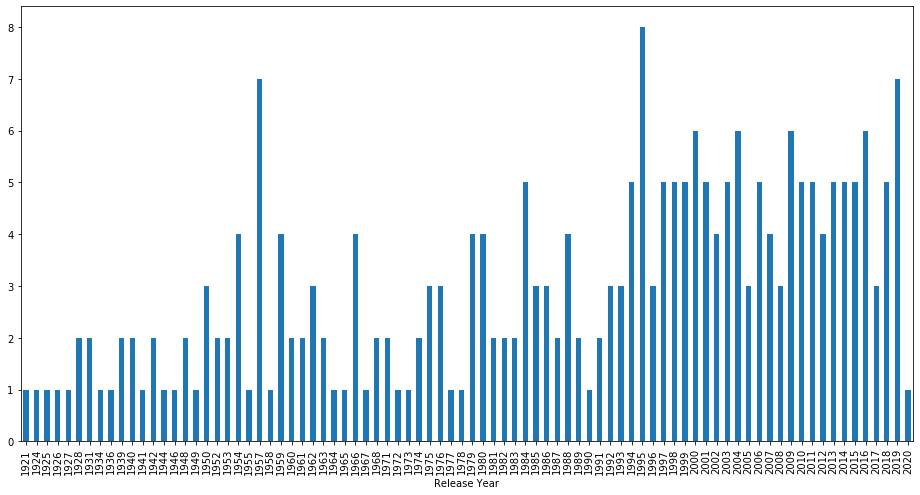

In [87]:
# Count of how many movies in the top 250 from a specific year
df_year_groups = df.groupby(by='Release Year')
df_year_groups.count()['Ratings'].plot.bar()

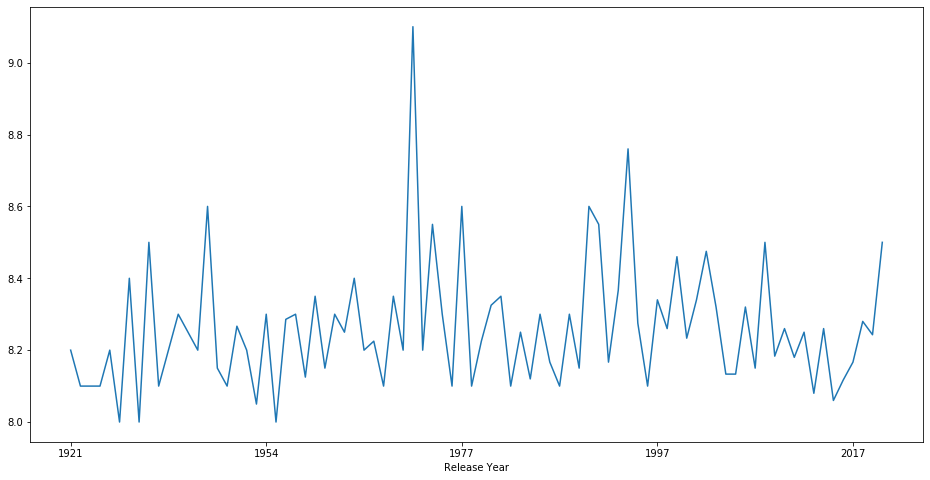

In [88]:
# Average rating in movies from specific year
df_year_groups.mean()['Ratings'].plot()

In [89]:
df2 = df.copy()
df2['Release Year'] = pd.to_datetime(df2['Release Year'], format='%Y')
df2.dtypes

Title                   object
Director                object
Actors                  object
Release Year    datetime64[ns]
Ratings                float32
dtype: object

In [90]:
df2

,Title,Director,Actors,Release Year,Ratings
0,Vykoupení z věznice Shawshank,Frank Darabont,"Tim Robbins, Morgan Freeman",1994-01-01,9.2
1,Kmotr,Francis Ford Coppola,"Marlon Brando, Al Pacino",1972-01-01,9.1
2,Kmotr II,Francis Ford Coppola,"Al Pacino, Robert De Niro",1974-01-01,9.0
3,Temný rytíř,Christopher Nolan,"Christian Bale, Heath Ledger",2008-01-01,9.0
4,Dvanáct rozhněvaných mužů,Sidney Lumet,"Henry Fonda, Lee J. Cobb",1957-01-01,8.9
...,...,...,...,...,...
245,Terminátor,James Cameron,"Arnold Schwarzenegger, Linda Hamilton",1984-01-01,8.0
246,Aladdin,Ron Clements,"Scott Weinger, Robin Williams",1992-01-01,8.0
247,Koe no katachi,Naoko Yamada,"Miyu Irino, Saori Hayami",2016-01-01,8.0
248,Mandariinid,Zaza Urushadze,"Lembit Ulfsak, Elmo Nüganen",2013-01-01,8.0


In [91]:
df2.describe(include='all')

,Title,Director,Actors,Release Year,Ratings
count,250,250,250,250,250.000000
unique,250,155,240,84,NaN
top,Grandhotel Budapešť,Christopher Nolan,"Mark Hamill, Harrison Ford",1995-01-01 00:00:00,NaN
freq,1,7,3,8,NaN
first,NaN,NaN,NaN,1921-01-01 00:00:00,NaN
last,NaN,NaN,NaN,2020-01-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,8.256400
std,NaN,NaN,NaN,NaN,0.230546
min,NaN,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,8.100000


In [92]:
df2[df2.Director == 'Christopher Nolan']

,Title,Director,Actors,Release Year,Ratings
3,Temný rytíř,Christopher Nolan,"Christian Bale, Heath Ledger",2008-01-01,9.0
12,Počátek,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt",2010-01-01,8.7
29,Interstellar,Christopher Nolan,"Matthew McConaughey, Anne Hathaway",2014-01-01,8.5
46,Dokonalý trik,Christopher Nolan,"Christian Bale, Hugh Jackman",2006-01-01,8.5
54,Memento,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss",2000-01-01,8.4
70,Temný rytíř povstal,Christopher Nolan,"Christian Bale, Tom Hardy",2012-01-01,8.3
127,Batman začíná,Christopher Nolan,"Christian Bale, Michael Caine",2005-01-01,8.2


In [113]:
df2_year_groups = df2.groupby(by='Release Year').mean()

In [108]:
df2_year_groups.reset_index(inplace=True)
df2_year_groups.describe()

,Ratings
count,84.000000
mean,8.261333
std,0.178748
min,8.000000
25%,8.133333
50%,8.238095
75%,8.321250
max,9.100000


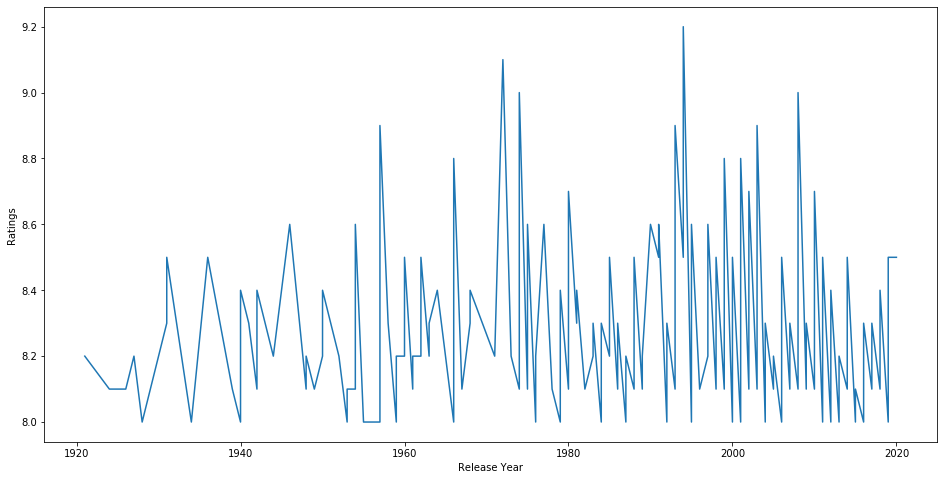

In [116]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.lineplot(x = 'Release Year', y = 'Ratings', data = df2, estimator=None)

In [148]:
# Directors with the highest average ratings 
df

,Title,Director,Actors,Release Year,Ratings
0,Vykoupení z věznice Shawshank,Frank Darabont,"Tim Robbins, Morgan Freeman",1994,9.2
1,Kmotr,Francis Ford Coppola,"Marlon Brando, Al Pacino",1972,9.1
2,Kmotr II,Francis Ford Coppola,"Al Pacino, Robert De Niro",1974,9.0
3,Temný rytíř,Christopher Nolan,"Christian Bale, Heath Ledger",2008,9.0
4,Dvanáct rozhněvaných mužů,Sidney Lumet,"Henry Fonda, Lee J. Cobb",1957,8.9
...,...,...,...,...,...
245,Terminátor,James Cameron,"Arnold Schwarzenegger, Linda Hamilton",1984,8.0
246,Aladdin,Ron Clements,"Scott Weinger, Robin Williams",1992,8.0
247,Koe no katachi,Naoko Yamada,"Miyu Irino, Saori Hayami",2016,8.0
248,Mandariinid,Zaza Urushadze,"Lembit Ulfsak, Elmo Nüganen",2013,8.0


In [136]:
df.groupby('Director').count().Title > 1

Director
Aamir Khan               False
Adam Elliot              False
Akira Kurosawa            True
Alejandro G. Iñárritu    False
Alfred Hitchcock          True
                         ...  
Wolfgang Petersen        False
Yasujirô Ozu             False
Yavuz Turgul             False
Zaza Urushadze           False
Çagan Irmak              False
Name: Title, Length: 155, dtype: bool

In [147]:
df.groupby('Director').count().transform(lambda x: x > 1)

,Title,Actors,Release Year,Ratings
Director,,,,
Aamir Khan,False,False,False,False
Adam Elliot,False,False,False,False
Akira Kurosawa,True,True,True,True
Alejandro G. Iñárritu,False,False,False,False
Alfred Hitchcock,True,True,True,True
...,...,...,...,...
Wolfgang Petersen,False,False,False,False
Yasujirô Ozu,False,False,False,False
Yavuz Turgul,False,False,False,False


In [149]:
mask = df.Director.duplicated(keep=False)

In [150]:
print(mask)

0       True
1       True
2       True
3       True
4       True
       ...  
245     True
246    False
247    False
248    False
249     True
Name: Director, Length: 250, dtype: bool


In [151]:
print(df[mask])

                             Title              Director  \
0    Vykoupení z věznice Shawshank        Frank Darabont   
1                            Kmotr  Francis Ford Coppola   
2                         Kmotr II  Francis Ford Coppola   
3                      Temný rytíř     Christopher Nolan   
4        Dvanáct rozhněvaných mužů          Sidney Lumet   
..                             ...                   ...   
238            Stalo se jedné noci           Frank Capra   
242              Princezna Nevěsta            Rob Reiner   
243                         Cirkus       Charles Chaplin   
245                     Terminátor         James Cameron   
249                    Kumonosu-jô        Akira Kurosawa   

                                    Actors Release Year  Ratings  
0              Tim Robbins, Morgan Freeman         1994      9.2  
1                 Marlon Brando, Al Pacino         1972      9.1  
2                Al Pacino, Robert De Niro         1974      9.0  
3          

In [153]:
print(df[~mask])

                                    Title            Director  \
14   Hvězdné války V: Impérium vrací úder      Irvin Kershner   
15                                 Matrix      Lana Wachowski   
20                        Život je krásný     Roberto Benigni   
21                             Město bohů  Fernando Meirelles   
22                        Mlčení jehňátek      Jonathan Demme   
..                                    ...                 ...   
241                        Černobílý svět         Tate Taylor   
244                         Bitva o Alžír    Gillo Pontecorvo   
246                               Aladdin        Ron Clements   
247                        Koe no katachi        Naoko Yamada   
248                           Mandariinid      Zaza Urushadze   

                                   Actors Release Year  Ratings  
14             Mark Hamill, Harrison Ford         1980      8.7  
15       Keanu Reeves, Laurence Fishburne         1999      8.6  
20     Roberto Benign

In [155]:
df_filtered_directors = df[mask]

In [156]:
df_filtered_directors.groupby('Director').Ratings.mean()

Director
Akira Kurosawa          8.242857
Alfred Hitchcock        8.250000
Andrei Tarkovsky        8.050000
Andrew Stanton          8.250000
Anthony Russo           8.350000
Billy Wilder            8.280000
Bong Joon Ho            8.300000
Chan-wook Park          8.200000
Charles Chaplin         8.283333
Christopher Nolan       8.514286
Clint Eastwood          8.133333
David Fincher           8.500000
David Lean              8.150000
Denis Villeneuve        8.150000
Francis Ford Coppola    8.833333
Frank Capra             8.233334
Frank Darabont          8.850000
Fritz Lang              8.250000
Guy Ritchie             8.150000
Hayao Miyazaki          8.240000
Ingmar Bergman          8.100000
James Cameron           8.266666
James Mangold           8.100000
Joel Coen               8.100000
Lee Unkrich             8.250000
Martin Scorsese         8.271429
Mel Gibson              8.200001
Milos Forman            8.450001
Pete Docter             8.100000
Peter Jackson           8.800000
P

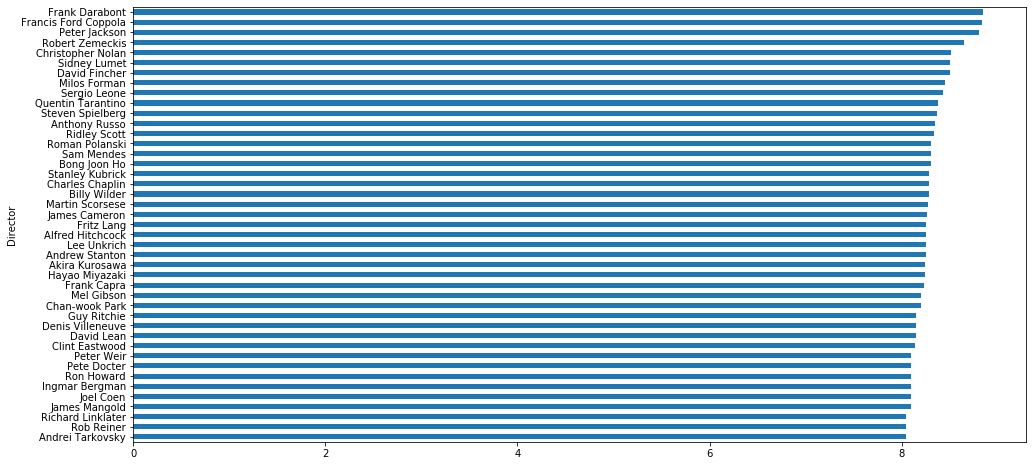

In [161]:
df_director_mean = df_filtered_directors.groupby('Director').Ratings.mean()
df_director_mean.sort_values(inplace=True)
df_director_mean.plot.barh()